In [164]:
import nbimporter
import helper_methods as hm
import preprocessing as pp
import numpy as np
import time
import pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from matplotlib import pyplot as plt

In [172]:
df = pp.read_file(company_symbol='AAPL')
values = list(df['ADJ_CLOSE'])

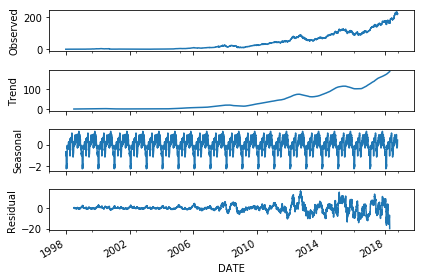

In [161]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(df['ADJ_CLOSE'],freq=252).plot()
result = sm.tsa.stattools.adfuller(df['ADJ_CLOSE'])
plt.show()

In [88]:
series = [3,10,12,13,12,10,12]

In [162]:
# given a series and alpha, return series of smoothed points
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series) + 1):
        result.append(alpha * series[n - 1] + (1 - alpha) * result[n-1])
    return result


print('exponential_smoothing(series, 0.1): ', exponential_smoothing(series, 0.1))
print('exponential_smoothing(series, 0.9): ', exponential_smoothing(series, 0.9))

for alpha in np.arange(0.0, 1.1, 0.1):
    print('prediction: ', exponential_smoothing(series, alpha)[-1])

exponential_smoothing(series, 0.1):  [3, 3.0, 3.7, 4.53, 5.377, 6.0393, 6.43537, 6.991833]
exponential_smoothing(series, 0.9):  [3, 3.0, 9.3, 11.73, 12.873000000000001, 12.0873, 10.20873, 11.820873]
prediction:  3.0
prediction:  6.991833
prediction:  9.292032
prediction:  10.523216999999999
prediction:  11.124288
prediction:  11.390625
prediction:  11.509248
prediction:  11.588937
prediction:  11.685312000000001
prediction:  11.820873
prediction:  12.0


In [171]:
def exponential_smoothing(panda_series, alpha_value):
    ouput = sum([alpha_value * (1 - alpha_value) ** i * x for i, x in 
                enumerate(reversed(panda_series))])
    return ouput

for alpha in np.arange(0.0, 1.1, 0.1):
    print('prediction: ', exponential_smoothing(series, alpha))
    
[(i, x) for i, x in enumerate(reversed(series))]

prediction:  0.0
prediction:  5.556942300000001
prediction:  8.662886400000003
prediction:  10.276154100000001
prediction:  11.040307200000003
prediction:  11.3671875
prediction:  11.5043328
prediction:  11.5882809
prediction:  11.685273600000002
prediction:  11.8208727
prediction:  12.0


[(0, 12), (1, 10), (2, 12), (3, 13), (4, 12), (5, 10), (6, 3)]

[3, 10, 12, 13, 12, 10, 12]
prediction:  [10.2857142]
prediction:  [10.39001279]
prediction:  [10.6703824]
prediction:  [11.00085344]
prediction:  [11.26211545]
prediction:  [11.42208386]
prediction:  [11.51440128]
prediction:  [11.58943901]
prediction:  [11.68533102]
prediction:  [11.82087307]
prediction:  [12.]


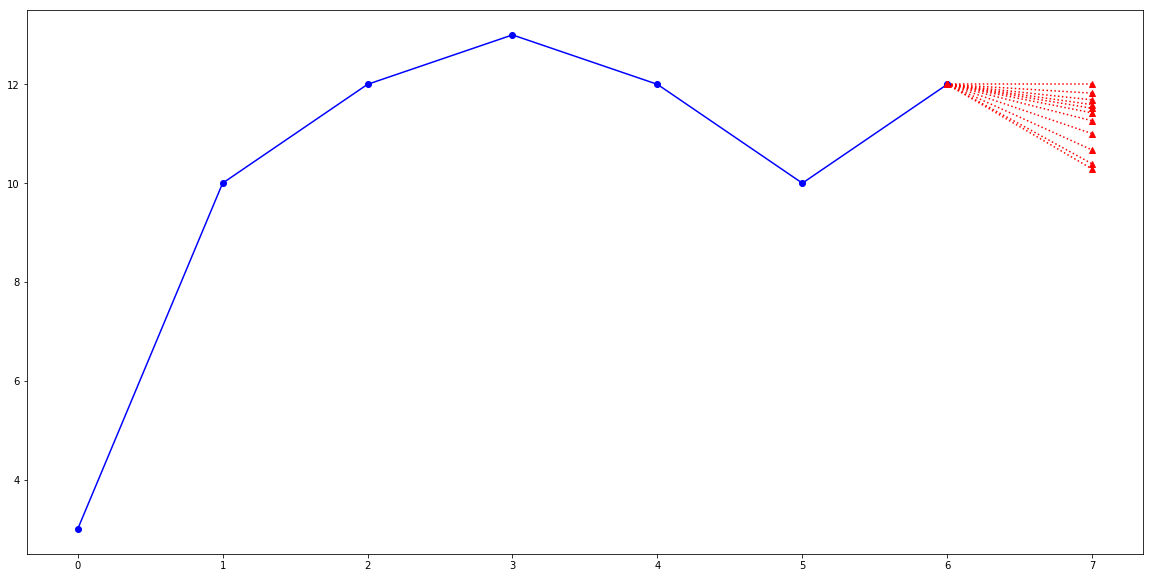

In [187]:
# single exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
data = [3,10,12,13,12,10,12]
print(data)
plt.figure(figsize=(20, 10))
plt.plot(data, 'bo-')
# create class
model = SimpleExpSmoothing(data)
# fit model
for alpha in np.arange(0.0, 1.1, 0.1):
    model_fit = model.fit(smoothing_level=alpha)
    # make prediction
    yhat = model_fit.predict()
    print('prediction: ', yhat)
    plt.plot([len(data) -1, len(data)], [data[-1], yhat], 'r^:')
plt.show()